In [14]:
import sys
!conda install --yes --prefix {sys.prefix} sklearn
!conda install --yes --prefix {sys.prefix} scipy

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - sklearn

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/osx-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.2.1                |   py37h1410ff5_0        15.6 MB
    ------------------------------------------------------------
  

In [ ]:
:import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install scipy

# Principal Component analysis

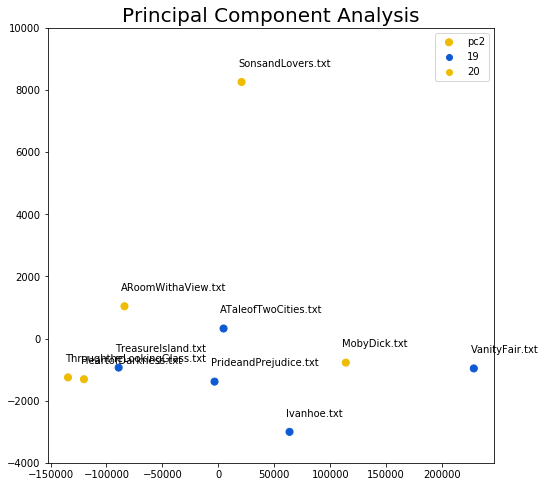

In [12]:
import re, nltk, os
import pandas as pd
from os.path import join
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv( 'data.csv' )
columns = ['sentences','syllables','nouns', 'adjectives','adverbs']
x = df.loc[:, columns ].values


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pcDf = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2'])


pcDf['century'] = pd.Series( df['century'] )
pcDf['title'] = pd.Series( df['title'] )

colours = []

legendDict = dict()
legendDict[19] = '#0e5ad3'
legendDict[20] = '#efbc04'

for index, column in df.iterrows():
    if column['century'] == 19:
        colours.append( legendDict[19] )
    else:
        colours.append( legendDict[20] )

fig = plt.figure(figsize = (8,8))
ax = plt.axes()


ax.set_title('Principal Component Analysis', fontsize = 20)
ax.scatter( pcDf['pc1'], pcDf[ 'pc2'] , s = 50 , c = colours )
ax.set_ylim( -4000 , 10000 )

for index , column in pcDf.iterrows():
    ax.annotate( column['title'] , ( column['pc1'] - 3000 , column[ 'pc2'] + 500 ))


for ld in legendDict:
    ax.scatter( [], [], c = legendDict[ld] , label = ld )
ax.legend()

plt.show()


# Hierarchical Cluster Analysis

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


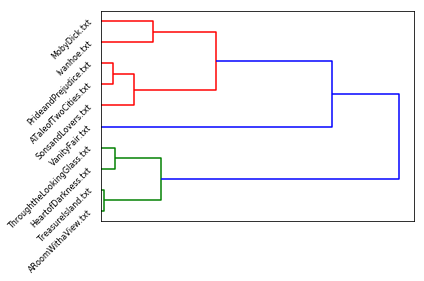

In [7]:

import re, nltk, os
import pandas as pd
from pandas import DataFrame
from os.path import join
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

%matplotlib inline

dir = 'Corpus'


df = pd.read_csv( 'data.csv' )

titles = []
for index , column in df.iterrows():
    titles.append( column['title'] )

columns = [ 'tokens','sentences','syllables']
x = df.loc[:, columns ].values


similarity = euclidean_distances(x)
linkages = linkage(similarity,'ward')


dendrogram( linkages ,  labels = titles , orientation="right", leaf_font_size=8,leaf_rotation=45)

import matplotlib.pyplot as plt

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tight_layout()
plt.show()
